# 2D Visualization of MNIST Dataset Using PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data 

In [3]:
# loading the dataset
d0 = pd.read_csv('train.csv')

# Store the label column in labels and remove it from our dataset
labels = d0['label']
data = d0.drop('label', axis=1)

In [9]:
# Make sure we have properly done everything
print("d Shape:",data.shape)
print("Labels Shape:",labels.shape)

d Shape: (42000, 784)
Labels Shape: (42000,)


## 2D Visualization using PCA

We will be applying PCA on all the 42000 data points
You can reduce your data points for faster implementation if you want

In [6]:
# Data Preprocessing: Standardization

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

print(standardized_data.shape)

/home/sayamss/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


/home/sayamss/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
# Converting our Standardized Data into Co-variance Matrix

co_matrix = np.matmul(standardized_data.T, standardized_data)
print("Shape of our co-variance matrix: ",co_matrix.shape)

Shape of our co-variance matrix:  (784, 784)


### Computing The Eigen Values and Eigen Vectors

In [8]:
# In this case, we will only find the top two eigen values and and their corresponding eigen vectors 
# as we are visualizing in 2D 

from scipy.linalg import eigh

values, vectors = eigh(co_matrix, eigvals=(782,783))

# We will transpose the eigen vectors into (2,d) shape
vectors = vectors.T
print("Shape of Vectors: ",vectors.shape)
print("Shape of Values: ",values.shape)

Shape of Vectors:  (2, 784)
Shape of Values:  (2,)


In [38]:
# Projecting our data on the plane
new_coords = np.matmul(vectors, standardized_data.T)
print("Shape of new data points: ", vectors.shape, "X", standardized_data.T.shape," = ", new_coords.shape)

Shape of new data points:  (2, 784) X (784, 42000)  =  (2, 42000)


In [44]:
# Attaching the labels to our new 2D projected Data
new_coords = np.vstack((new_coords,labels)).T

# Creating a new dataframe for our fresh 2d data with labels
df = pd.DataFrame(data=new_coords, columns=("1st_principal", "2nd_principal", "label"))
print(df.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


## Plotting The Data

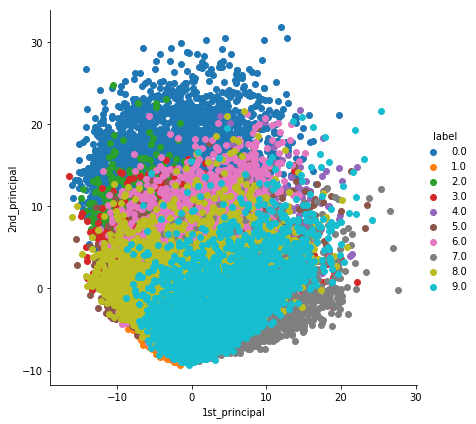

In [52]:
# Plotting the data using seaborn with label as our hue
sns.FacetGrid(df, hue="label",height=6)\
   .map(plt.scatter, "1st_principal", "2nd_principal")\
   .add_legend();
plt.show()